In [1]:
import numpy as np
rand = np.random.RandomState(42)
x = rand.randint(100, size=10)
print(x)

[51 92 14 71 60 20 82 86 74 74]


In [2]:
[x[3],x[7],x[2]]

[71, 86, 14]

In [3]:
ind = [3,7,2]
x[ind]

array([71, 86, 14])

In [4]:
ind = np.array([[3,7],
               [4,5]])
x[ind]

array([[71, 86],
       [60, 20]])

In [5]:
x = np.arange(12).reshape((3,4))
x

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [6]:
row = np.array([0,1,2])
col = np.array([2,1,3])
x[row,col] # x[0,2] x[1,1] x[2,3] 을 출력

array([ 2,  5, 11])

In [7]:
x[row[:, np.newaxis], col] # 팬시 인덱싱에서 인덱스 쌍을 만드는 것은 브로드캐스팅 규칙을 따른다

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

In [8]:
x[2,[2,0,1]]
x[1:, [2,0,1]]

array([[ 6,  4,  5],
       [10,  8,  9]])

In [9]:
mask = np.array([1,0,1,0], dtype=bool)
x[row[:,np.newaxis],mask]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

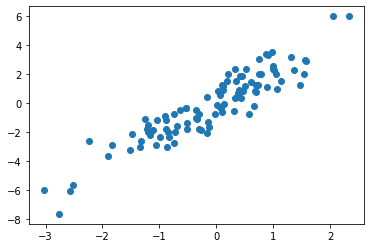

In [10]:
#예제 임의의 점 선택하기
mean  = [0,0]
cov = [[1,2],
       [2,5]]
X = rand.multivariate_normal(mean,cov,100)

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set
plt.scatter(X[:,0], X[:,1]);

In [11]:
indices = np.random.choice(X.shape[0], 20, replace=False)
selection = X[indices]
selection.shape

(20, 2)

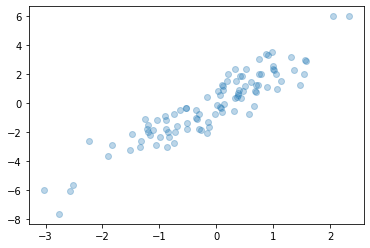

In [12]:
plt.scatter(X[:,0], X[:,1], alpha = 0.3)
plt.scatter(selection[:,0], selection[:,1],
           facecolor = 'none', s=200);

In [13]:
# 펜시 인덱싱으로 값 변경하기
x = np.arange(10)
i = np.array([2,1,8,4])
x[i] = 88
x

array([ 0, 88, 88,  3, 88,  5,  6,  7, 88,  9])

In [14]:
x[i] -= 10
print(x)

[ 0 78 78  3 78  5  6  7 78  9]


In [15]:
x = np.zeros(10)
x[[0,0]] = [4,6]
print(x)

[6. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [22]:
x = np.zeros(10)
i = [2,3,3,4,4,4]
x[i] += 1 
# x[i] += 1 이 x[i] = x[i] + 1의 축약형을 의미.
# x[i] + 1 이 평가되고 나면결과가 x의 인덱스에 할당
print(x)

# 연산이 반복되게 하는 방법
x = np.zeros(10)
i = [2,3,3,4,4,4]
np.add.at(x,i,1)
print(x)

[0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
[0. 0. 1. 2. 3. 0. 0. 0. 0. 0.]


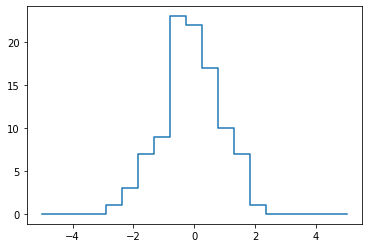

In [45]:
# 예제 : 데이터 구간화
np.random.seed(42)
x = np.random.randn(100)
# 직접 히스토그램 계산하기
bins = np.linspace(-5,5,20)
counts = np.zeros_like(bins)
# 각 x에 대한 적절한 구간 찾기
i = np.searchsorted(bins,x)
# 각 구간에 1 더하기
np.add.at(counts,i,1)

plt.plot(bins, counts, drawstyle='steps');